
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** Its the fundamental unit of a NN in charge of receiving and classifying input values through an activation function.

- **Input Layer:** First layer of a NN that provides the raw input values to the other layers for processing.

- **Hidden Layer:** Core of the NN where the input values are processed base on a defined architecture of the NN

- **Output Layer:** Last layer of the NN in charge of producing the outputs for the program.

- **Activation:** A process where the weighted sum of the inputs is transformed into an output by a mathematical function in a neuron.

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

YOUR ANSWER HERE

*   **Back-propagation** is the process of propagating the total loss backwards into the NN to calculate how much of the loss each neuron is responsible for, and subsequently update the weights in such way that minimizes the the loss. 
*   **Gradient Descent** process that occurs in the backpropagation phase where the Gradient Descent algorithm in each iteration updates the weigths to optimize the value of the loss function, with respect to the weights used in the network. the Size of the changes that are made to the weights during this process is determined by the learning rate.



Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

The input layer sends the initial values to each neuron in the next layer through channels where they are multiplied by the channels' respective weights, the sum of these products is summarized along with bias associated with the neurons and passed through an activation function, the values obtained determine if the neurons are activated or not. Those who get active pass the values to the next layer in the network. The values reach the output layer as probabilities that determine the result of the NN. When training the results are compared with the actual answers to send feedback through the NN and update the weights to improve the NN accuracy and reduce the loss function.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

This word is spelled right. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# YOUR CODE HERE
model1 = Sequential()

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(X,y, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.5233
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.5233
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.5200
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.5200
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.5133
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.5100
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5033
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5000
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.4967
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.4967


In [5]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [6]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'name': 'dense_input',
   'ragged': False,
   'sparse': False}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

In [7]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [8]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [9]:
# build and fit model
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.0002, patience=1, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)
# YOUR CODE HERE
model2 = Sequential()

model2.add(Dense(32, 'relu'))
model2.add(Dense(20, 'relu'))
model2.add(Dense(1, 'sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=100, callbacks=[early_stopping_callback])

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.7220 - accuracy: 0.2667
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5967
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.9000
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.9200
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.9400
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.9367
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.9333
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.9433
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.9467
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.9433
Epoch 11/

In [10]:
h2.model.callback_used = True

In [11]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [12]:
# Hidden tests - you will see the results when you submit to Canvas

In [13]:
#!pip install mlxtend

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [14]:
X.shape, y.shape

((300, 2), (300,))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


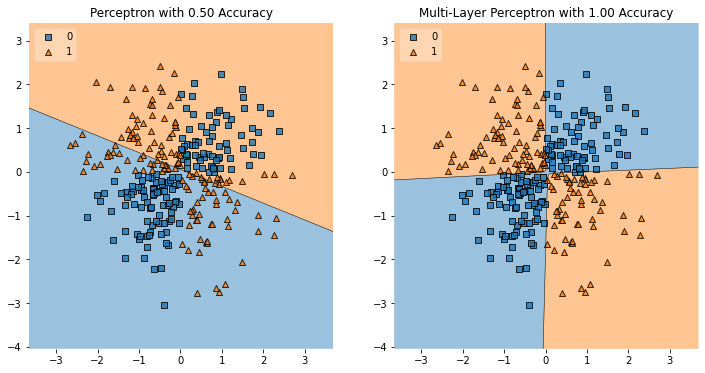

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

**The Perceptron** is a linear classifier, therefore it will never get to the state with all the input vectors classified correctly if the training set is not linearly separable.
**A Multi-Layer Perceptron** can be applied to non-linear problems.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1


In [17]:
np.array(df[df.columns[df.columns != 'target']]).shape

(303, 13)

In [18]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
X = np.array(df[df.columns[df.columns != 'target']])
Y = np.array(df['target'])

In [19]:
X.shape

(303, 13)

In [20]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [21]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [22]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model(activation='sigmoid', optimizer='adam'):

    model = Sequential()
    model.add(Dense(100, input_dim=13, activation=activation))
    model.add(Dense(30, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [23]:
# Visible Testing
assert create_model().__module__ == 'keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [24]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn=create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Visible Testing
assert model.__module__ == 'keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [26]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

param_grid = {'optimizer':['adam', 'adamax'],
              'activation': ['sigmoid', 'relu']}

In [27]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [28]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=2, cv=3)
grid_result = gs.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
4/4 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.5842
[CV] END .................activation=sigmoid, optimizer=adam; total time=   0.8s
4/4 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.4752
[CV] END .................activation=sigmoid, optimizer=adam; total time=   0.8s
4/4 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.6139
[CV] END .................activation=sigmoid, optimizer=adam; total time=   0.7s
4/4 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.4158
[CV] END ...............activation=sigmoid, optimizer=adamax; total time=   0.7s
4/4 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5149
[CV] END ...............activation=sigmoid, optimizer=adamax; total time=   0.8s
4/4 [==============================] - 0s 3ms/step - loss: 0.8796 - accuracy: 0.4653
[CV] END ...............a

In [29]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5577557782332102 using {'activation': 'sigmoid', 'optimizer': 'adam'}
Means: 0.5577557782332102, Stdev: 0.059589006178476234 with: {'activation': 'sigmoid', 'optimizer': 'adam'}
Means: 0.4653465449810028, Stdev: 0.04042063510541427 with: {'activation': 'sigmoid', 'optimizer': 'adamax'}
Means: 0.495049516359965, Stdev: 0.0631390404765296 with: {'activation': 'relu', 'optimizer': 'adam'}
Means: 0.5148515005906423, Stdev: 0.02800423466092198 with: {'activation': 'relu', 'optimizer': 'adamax'}
